# **Weather Analysis using Gaussian Process Regression**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin

In [8]:
np.random.seed(1)

df = pd.read_excel('drive/MyDrive/Content/weather_data.xlsx')

df.head(5)

,RecNum,GHI_CMP11 W/m^2,DNI_CHP1 W/m^2,DHI_CMP11 W/m^2,DHI_CMP11_Shadowband W/m^2,UVA_Avg W/m,UVB_Avg W/m,Air_Temp Deg C,BP,RH %,WS meters/second,WD deg,WD_SD deg
0,0,368.526,113.637,294.286,245.797,10.6545,1.89591,21.35,998.527,77.3,2.581,223.1,32.1
1,1,705.1,645.038,225.304,188.423,18.9379,3.12685,22.53,998.555,68.88,3.144,234.3,34.23
2,2,881.583,40.2528,839.971,186.649,27.9445,3.99945,22.7,998.936,73.41,5.512,223.4,30.92
3,3,899.796,452.43,453.606,315.231,31.8876,4.20269,23.04,999.555,55.2,5.916,219.7,29.46
4,4,1089.67,896.762,184.652,157.458,39.0073,4.95673,24.46,999.615,59.46,5.885,223,30.3


In [11]:
df_array = np.asarray(df)

rec_num = df_array[0:177, 0]
ghi = df_array[0:177, 1]
DNI = df_array[0:177, 2]
DHI = df_array[0:177, 3]
DHI_shadowband = df_array[0:177, 4]
UVA = df_array[0:177, 5]
UVB = df_array[0:177, 6]
air_temp = df_array[0:177, 7]
BP = df_array[0:177, 8]
RH = df_array[0:177, 9]
WS = df_array[0:177, 10]
WD = df_array[0:177, 11]
WD_SD = df_array[0:177, 12]

y = np.asarray(
    [ghi, DNI, DHI, DHI_shadowband, UVA, UVB, air_temp, BP, RH, WS, WD,
     WD_SD]).T

X = np.atleast_2d([
    1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17.,
    18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
    33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
    48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
    63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
    78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
    93., 94., 95., 96., 97., 98., 99., 100., 101., 102., 103., 104., 105.,
    106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
    118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
    130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
    142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
    154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
    166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177
]).T

In [57]:
x = np.atleast_2d(np.linspace(1, 177, 10000)).T 


kernel = C()*Exp(length_scale=24,periodicity=1)  

gp1 = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10)

gp1.fit(X, y)
y_pred_1, sigma_1 = gp1.predict(x, return_std=True)


kernel = C()*RBF(length_scale=24, length_scale_bounds=(1e-5, 2)) 
gp1.kernel_

gp2 = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10)


gp2.fit(X, y)
y_pred_2, sigma_2 = gp2.predict(x, return_std=True)
gp2.kernel_

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


285**2 * RBF(length_scale=1.3)

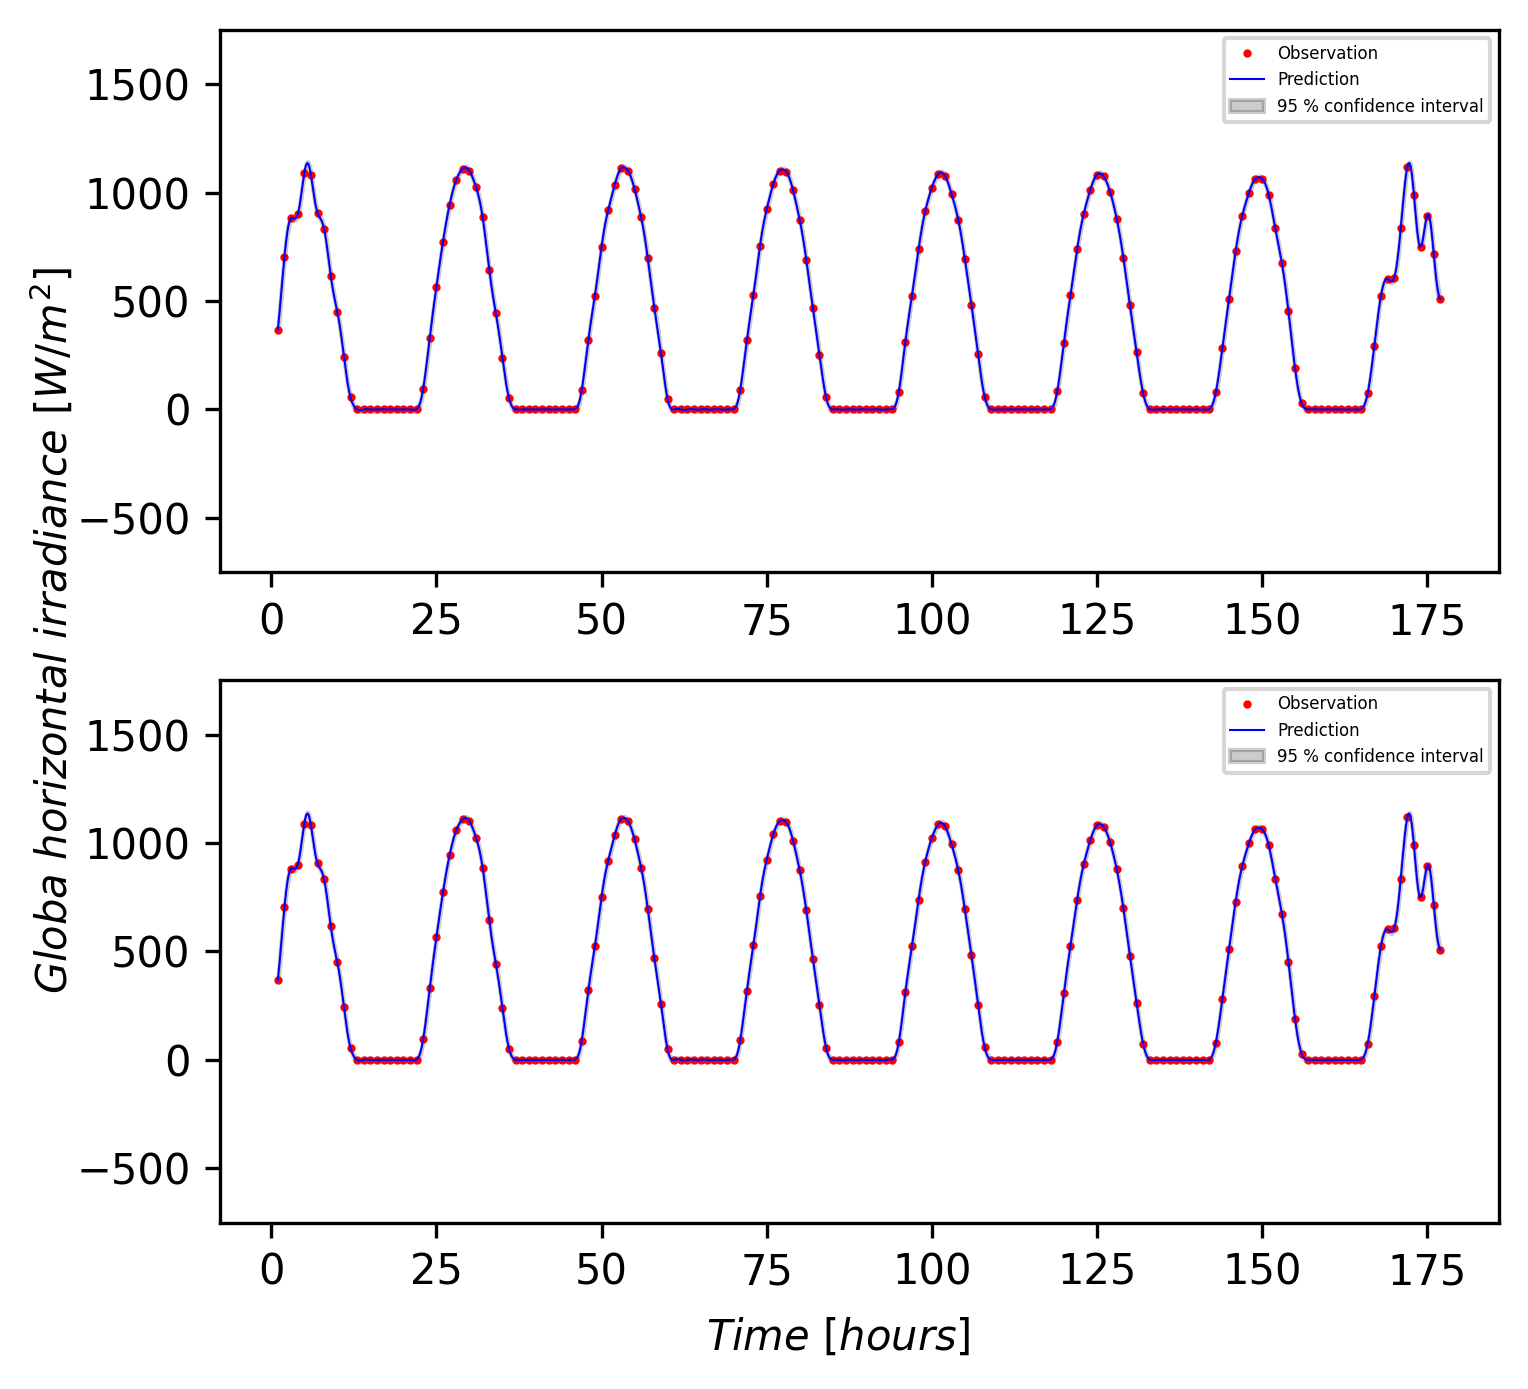

In [67]:
#Plot figure
fig = plt.figure(
    num=1, figsize=(5.5, 0.2), dpi=300, facecolor='w', edgecolor='k')
fig.text(0.5, -2, '$Time\ [hours]$', ha='center')
fig.text(
    0.01,
    10,
    '$Globa\ horizontal\ irradiance\ [W/m^2]$',
    va='center',
    rotation='vertical')

plt.subplot(2, 1, 1)
plt.plot(X, y[:, 0], 'r.', markersize=2, label=u'Observation')
plt.plot(x, y_pred_1[:, 0], 'b-', linewidth=0.5, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_1[:, 0] - 1.96 * sigma_1,
    y_pred_1[:, 0] + 1.96 * sigma_1,
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('')
plt.legend(loc='upper right', fontsize=4)
plt.ylim(-750, 1750)

plt.subplot(2, 1, 2)
plt.plot(X, y[:, 0], 'r.', markersize=2, label=u'Observation')
plt.plot(x, y_pred_2[:, 0], 'b-', linewidth=0.5, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_2[:, 0] - 1.96 * sigma_2,
    y_pred_2[:, 0] + 1.96 * sigma_2,
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('')
plt.legend(loc='upper right', fontsize=4)
plt.ylim(-750, 1750)

plt.subplots_adjust(top=20)

plt.savefig('all_in.png', bbox_inches='tight')

#---------------------------------